In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

In [36]:
def lotke_model(t,a,y):
    r , f = y
    dr_dt = 2*r-a*r*f
    df_dt = -f+a*r*f
    return dr_dt,df_dt
        

In [26]:
r0 = 5
f0 = 5
a = .01

In [55]:
T = 50
sol = integrate.solve_ivp(lambda t,y:lotke_model(t,a,y),[0,T],[r0,f0],dense_output = True)

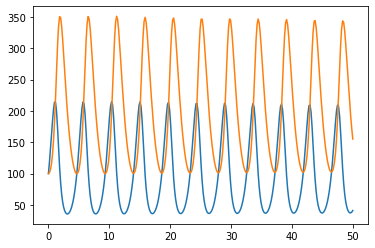

In [58]:
t = np.linspace(0,T,300)
y = sol.sol(t)
r, f =y[0, :], y[1, :]
plt.plot(t,r)
plt.plot(t,f)
pass